In [ ]:
import numpy as np
import pandas as pf
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
import random

In [ ]:
## load results
with open('drive/My Drive/Model1/results1.pkl', 'rb') as f:
    results = pickle.load(f)

In [ ]:
## load ensemble results
with open('drive/My Drive/results_ens.pkl', 'rb') as f:
    results_ens = pickle.load(f)

In [ ]:
## check some statistics
np.mean(results_ens['satellite']["Ensemble1"]['f1_scores'])
np.percentile(results['both']["Random Forest"]['probs_1'],25)

0.6491769331238022

In [ ]:
## sample points
import random
random.sample(negative_class_probabilities,200)

[2.0190478401877207e-05,
 0.0001827717280159898,
 4.064110040160482e-06,
 0.01054958582953412,
 3.257591274013827e-09,
 0.0004724945323169753,
 0.26899988724576085,
 0.0026622649852047174,
 0.0006875765391267098,
 9.56045512006608e-12,
 2.0684307389506627e-05,
 1.5848332917825393e-11,
 1.2225295964422676e-09,
 9.732899176365108e-08,
 1.1564310381378233e-06,
 2.1874748003899752e-10,
 1.5634310707372642e-06,
 8.9966982826842e-08,
 9.696280980031046e-06,
 1.429648378529046e-06,
 3.49262978999661e-10,
 1.0415660051452474e-07,
 0.0007061119454805593,
 7.99724974444518e-13,
 0.019437950719060283,
 3.2753722526041614e-09,
 4.3063184457329804e-10,
 0.00015897981869306862,
 0.00017382329468692065,
 2.364086216458244e-11,
 0.004089799737697507,
 2.9315846199301916e-08,
 0.05283394387261911,
 0.0013681002993508455,
 0.00015084466146951346,
 6.3911325964364605e-09,
 3.495129731113318e-11,
 0.02012902654161882,
 1.872461643331567e-05,
 2.350703406009395e-06,
 1.7504648182038612e-11,
 0.007712956969

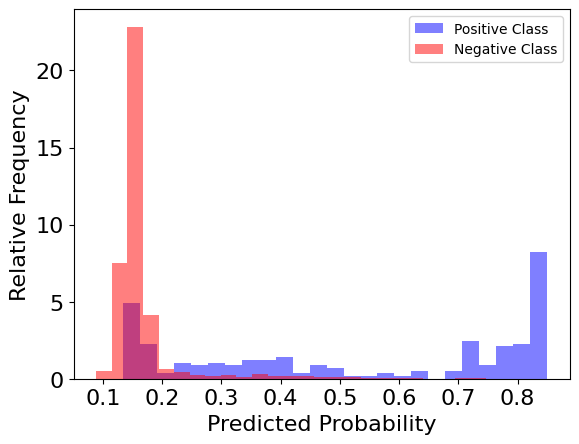

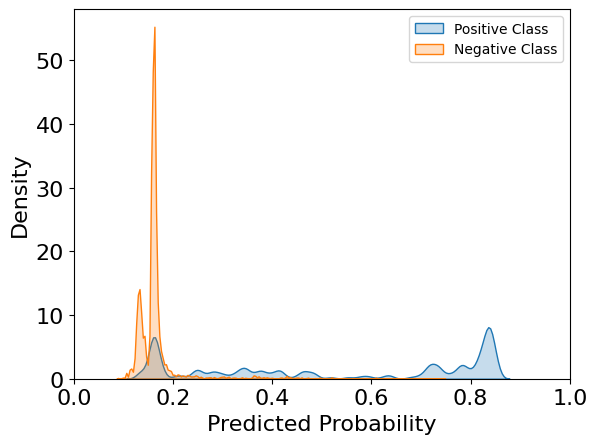

In [ ]:
## probability figure
threshold = 0.5
positive_class_probabilities = results_ens['both']["Ensemble2"]['probs_1']
negative_class_probabilities = results_ens['both']['Ensemble2']['probs_0']
plt.hist(positive_class_probabilities, bins=25, density=True, alpha=0.5, color='blue', label='Positive Class')
plt.hist(negative_class_probabilities,bins =25, density =True, alpha = 0.5, color = 'red',label = 'Negative Class')
plt.xlabel('Predicted Probability',fontsize=16)
plt.ylabel('Relative Frequency',fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
#plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold: {threshold}')
#plt.title('Histogram of Predicted Pribability',fontsize = 16)
plt.legend()
plt.savefig('Histogram.png',dpi=600,bbox_inches='tight')
plt.show()

# kde
sns.kdeplot(positive_class_probabilities,fill=True,label = 'Positive Class',bw_adjust = 0.1)
sns.kdeplot(negative_class_probabilities,fill=True,label = 'Negative Class',bw_adjust=0.1)
#plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold: {threshold}')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Predicted Probability',fontsize=16)
plt.ylabel('Density',fontsize = 16)
#plt.title('Density Estimate of Predicted Probability',fontsize=16)
plt.xlim(0, 1)
plt.legend()
plt.savefig('Density.png',dpi=600,bbox_inches='tight')
plt.show()

In [ ]:
## load model
ada= load("drive/My Drive/Model1/AdaBoost_both_2_model.joblib")

In [ ]:
## ROC curve of nine models
features_sets = {
    'glider': ['depth', 'salinity', 'temperature', 'oxygen_concentration','season'],
    'satellite': ['chl_oc3', 'sst', 'M_WK', 'M_WK_G','season'],
    'both': ['depth', 'salinity', 'temperature', 'oxygen_concentration', 'chl_oc3', 'sst', 'M_WK', 'M_WK_G','season']
}
models_dict = {
    "Logistic Regression": None,
    "SVM": None,
    "KNN": None,
    "Random Forest": None,
    "AdaBoost": None,
    "MLP": None,
    "CNN": None,
    #"Ensemble": None,
    "XGBoost": None,
    "ResNet": None
    #"Ensemble1": None,
    #"Ensemble2": None
}
## ROC curve
# iterate across feature sets, confusion matrix
# for feature_set_name, feature_set in features_sets.items():
#     fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(24, 24), dpi=300,
#                              gridspec_kw={'width_ratios': [1, 1, 1], 'height_ratios': [1, 1, 1]})  # adjust the figure
#     #fig.suptitle(f'Feature Set: {feature_set_name}', fontsize=30, y=0.93)

#     for idx, (model_name, model) in enumerate(models_dict.items()):
#         ax = axes[idx // 3, idx % 3]
#         result = results[feature_set_name][model_name]
#         sns.heatmap(result['cumulative_confusion_matrix'], annot=True, fmt='g', cmap='YlGnBu',
#                     cbar=False, ax=ax, annot_kws={'size': 30})
#         ax.set_title(model_name, fontsize=30)

#         # delete labels, set tick_params
#         ax.set_xlabel('')
#         ax.set_ylabel('')
#         ax.set_xticklabels(['0', '1'],fontsize=30)
#         ax.set_yticklabels(['0', '1'],fontsize=30)

#     # add label
#     fig.text(0.5, 0.06, 'Predicted', ha='center', fontsize=50)  # x
#     fig.text(0.02, 0.5, 'Actual', va='center', rotation='vertical', fontsize=50)  # y

#     # add single colorbar
#     sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=0, vmax=8550))
#     sm.set_array([])
#     cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])  # adjust location
#     cbar = fig.colorbar(sm, cax=cbar_ax)
#     cbar.set_label('Number of Samples', fontsize=50)
#     cbar.ax.tick_params(labelsize=30)
#     plt.tight_layout(rect=[0.05, 0.1, 0.9, 0.9])
#     plt.show()

# for feature_set_name, feature_set in features_sets.items():
#     fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(24, 24), dpi=300,
#                              gridspec_kw={'width_ratios': [1, 1, 1], 'height_ratios': [1, 1, 1]})
#     #fig.suptitle(f'Feature Set: {feature_set_name}', fontsize=30, y=0.93)

#     for idx, (model_name, model) in enumerate(models_dict.items()):
#         ax = axes[idx // 3, idx % 3]
#         result = results[feature_set_name][model_name]
#         sns.heatmap(result['cumulative_confusion_matrix'], annot=True, fmt='g', cmap='YlGnBu',
#                     cbar=False, ax=ax, annot_kws={'size': 30})
#         ax.set_title(model_name, fontsize=30)

#
#         ax.set_xlabel('')
#         ax.set_ylabel('')
#         ax.set_xticklabels(['0', '1'],fontsize=30)
#         ax.set_yticklabels(['0', '1'],fontsize=30)

#
#     fig.text(0.5, 0.06, 'Predicted', ha='center', fontsize=50)
#     fig.text(0.02, 0.5, 'Actual', va='center', rotation='vertical', fontsize=50)

#
#     sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=0, vmax=8550))
#     sm.set_array([])
#     cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])
#     cbar = fig.colorbar(sm, cax=cbar_ax)
#     cbar.set_label('Number of Samples', fontsize=50)
#     cbar.ax.tick_params(labelsize=30)
#     plt.tight_layout(rect=[0.05, 0.1, 0.9, 0.9])
#     plt.show()

for feature_set_name, feature_set in features_sets.items():
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(24, 24), dpi=300,
                             gridspec_kw={'width_ratios': [1, 1, 1], 'height_ratios': [1, 1, 1]})
    # fig.suptitle(f'Feature Set: {feature_set_name}', fontsize=30, y=0.93)

    for idx, (model_name, model) in enumerate(models_dict.items()):
        ax = axes[idx // 3, idx % 3]
        result = results[feature_set_name][model_name]

        # mean, std
        mean_fpr = np.linspace(0, 1, 100)
        mean_tpr = np.mean(result['tprs_interpolated'], axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_tpr = np.std(result['tprs_interpolated'], axis=0)
        lower_bound = np.clip(mean_tpr + std_tpr, 0, 1)
        upper_bound = np.clip(mean_tpr - std_tpr, 0, 1)

        # Roc and CI
        ax.plot(mean_fpr, mean_tpr, color='darkorange', lw=2, label=f'Average ROC')
        ax.fill_between(mean_fpr, lower_bound, upper_bound, color='grey', alpha=0.2, label='±1 std. dev.')
        ax.plot([0, 1], [0, 1], linestyle='--', color='navy', lw=2, label='Random Guess')
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1.05])
        ax.set_title(model_name, fontsize=30)

        # add auc in top left of each subfigure
        auc_label = f'AUC = {mean_auc:.2f}'
        ax.text(0.05, 0.95, auc_label, transform=ax.transAxes, fontsize=25, verticalalignment='top')

        # clean ticks
        ax.tick_params(axis='both', labelsize=25)

    # get
    handles, labels = axes[0, 0].get_legend_handles_labels()

# add legend only in the lase subfigure
    final_ax = axes[2, 2]
    final_ax_legend = final_ax.legend(handles, labels, loc='lower right', fontsize=24, handleheight=1, handlelength=2)
    final_ax.add_artist(final_ax_legend)

    fig.text(0.5, 0.06, 'False Positive Rate', ha='center', fontsize=50)  # x
    fig.text(0.02, 0.5, 'True Positive Rate', va='center', rotation='vertical', fontsize=50)  # y

    plt.tight_layout(rect=[0.05, 0.1, 0.95, 0.9])
    plt.savefig(f'{feature_set_name}.png',dpi=600,bbox_inches='tight')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.3 MB/s eta 0:00:00


In [ ]:
from joblib import load

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load model, feature importance
rf_both_model = load("drive/My Drive/Model1/Random Forest_both_2_model.joblib")
feature_importances = rf_both_model.feature_importances_
feature_names = ['Depth', 'Salinity', 'Temperature', 'Oxygen Concentration', 'Chlorophyll', 'Sea Surface Temperature', 'Water Mass', 'Frontal Value', 'Season']

importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=True)

# define different color to different varaible
default_color = 'black'
colors_x = []
for feature in importances_df['Feature']:
    if feature in ['Depth', 'Salinity', 'Temperature', 'Oxygen Concentration']:
        colors_x.append('darkorange')
    elif feature in ['Chlorophyll', 'Sea Surface Temperature', 'Water Mass', 'Frontal Value']:
        colors_x.append('green')
    else:
        colors_x.append(default_color)


plt.figure(figsize=(10, 6), dpi=600)

plt.title("Random Forest", fontsize=26)
plt.barh(importances_df['Feature'], importances_df['Importance'], color='LightBLue', align="center")

# set tick and label
ax = plt.gca()
ax.set_yticks(range(len(importances_df['Feature'])))
ax.set_yticklabels(importances_df['Feature'], fontsize=18)
plt.xlabel('Mean Decrease In Impurity', fontsize=22)
#plt.ylabel('Features', fontsize=22)

# modify color
for ticklabel, color in zip(ax.get_yticklabels(), colors_x):
    ticklabel.set_color(color)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.grid()
plt.savefig('RFI.png', dpi=600,bbox_inches='tight')
plt.show()


                   Feature  Importance
7            Frontal Value    0.203221
1                 Salinity    0.182682
5  Sea Surface Temperature    0.138775
8                   Season    0.120457
3     Oxygen Concentration    0.110385
6               Water Mass    0.076059
2              Temperature    0.065307
4              Chlorophyll    0.064891
0                    Depth    0.038223


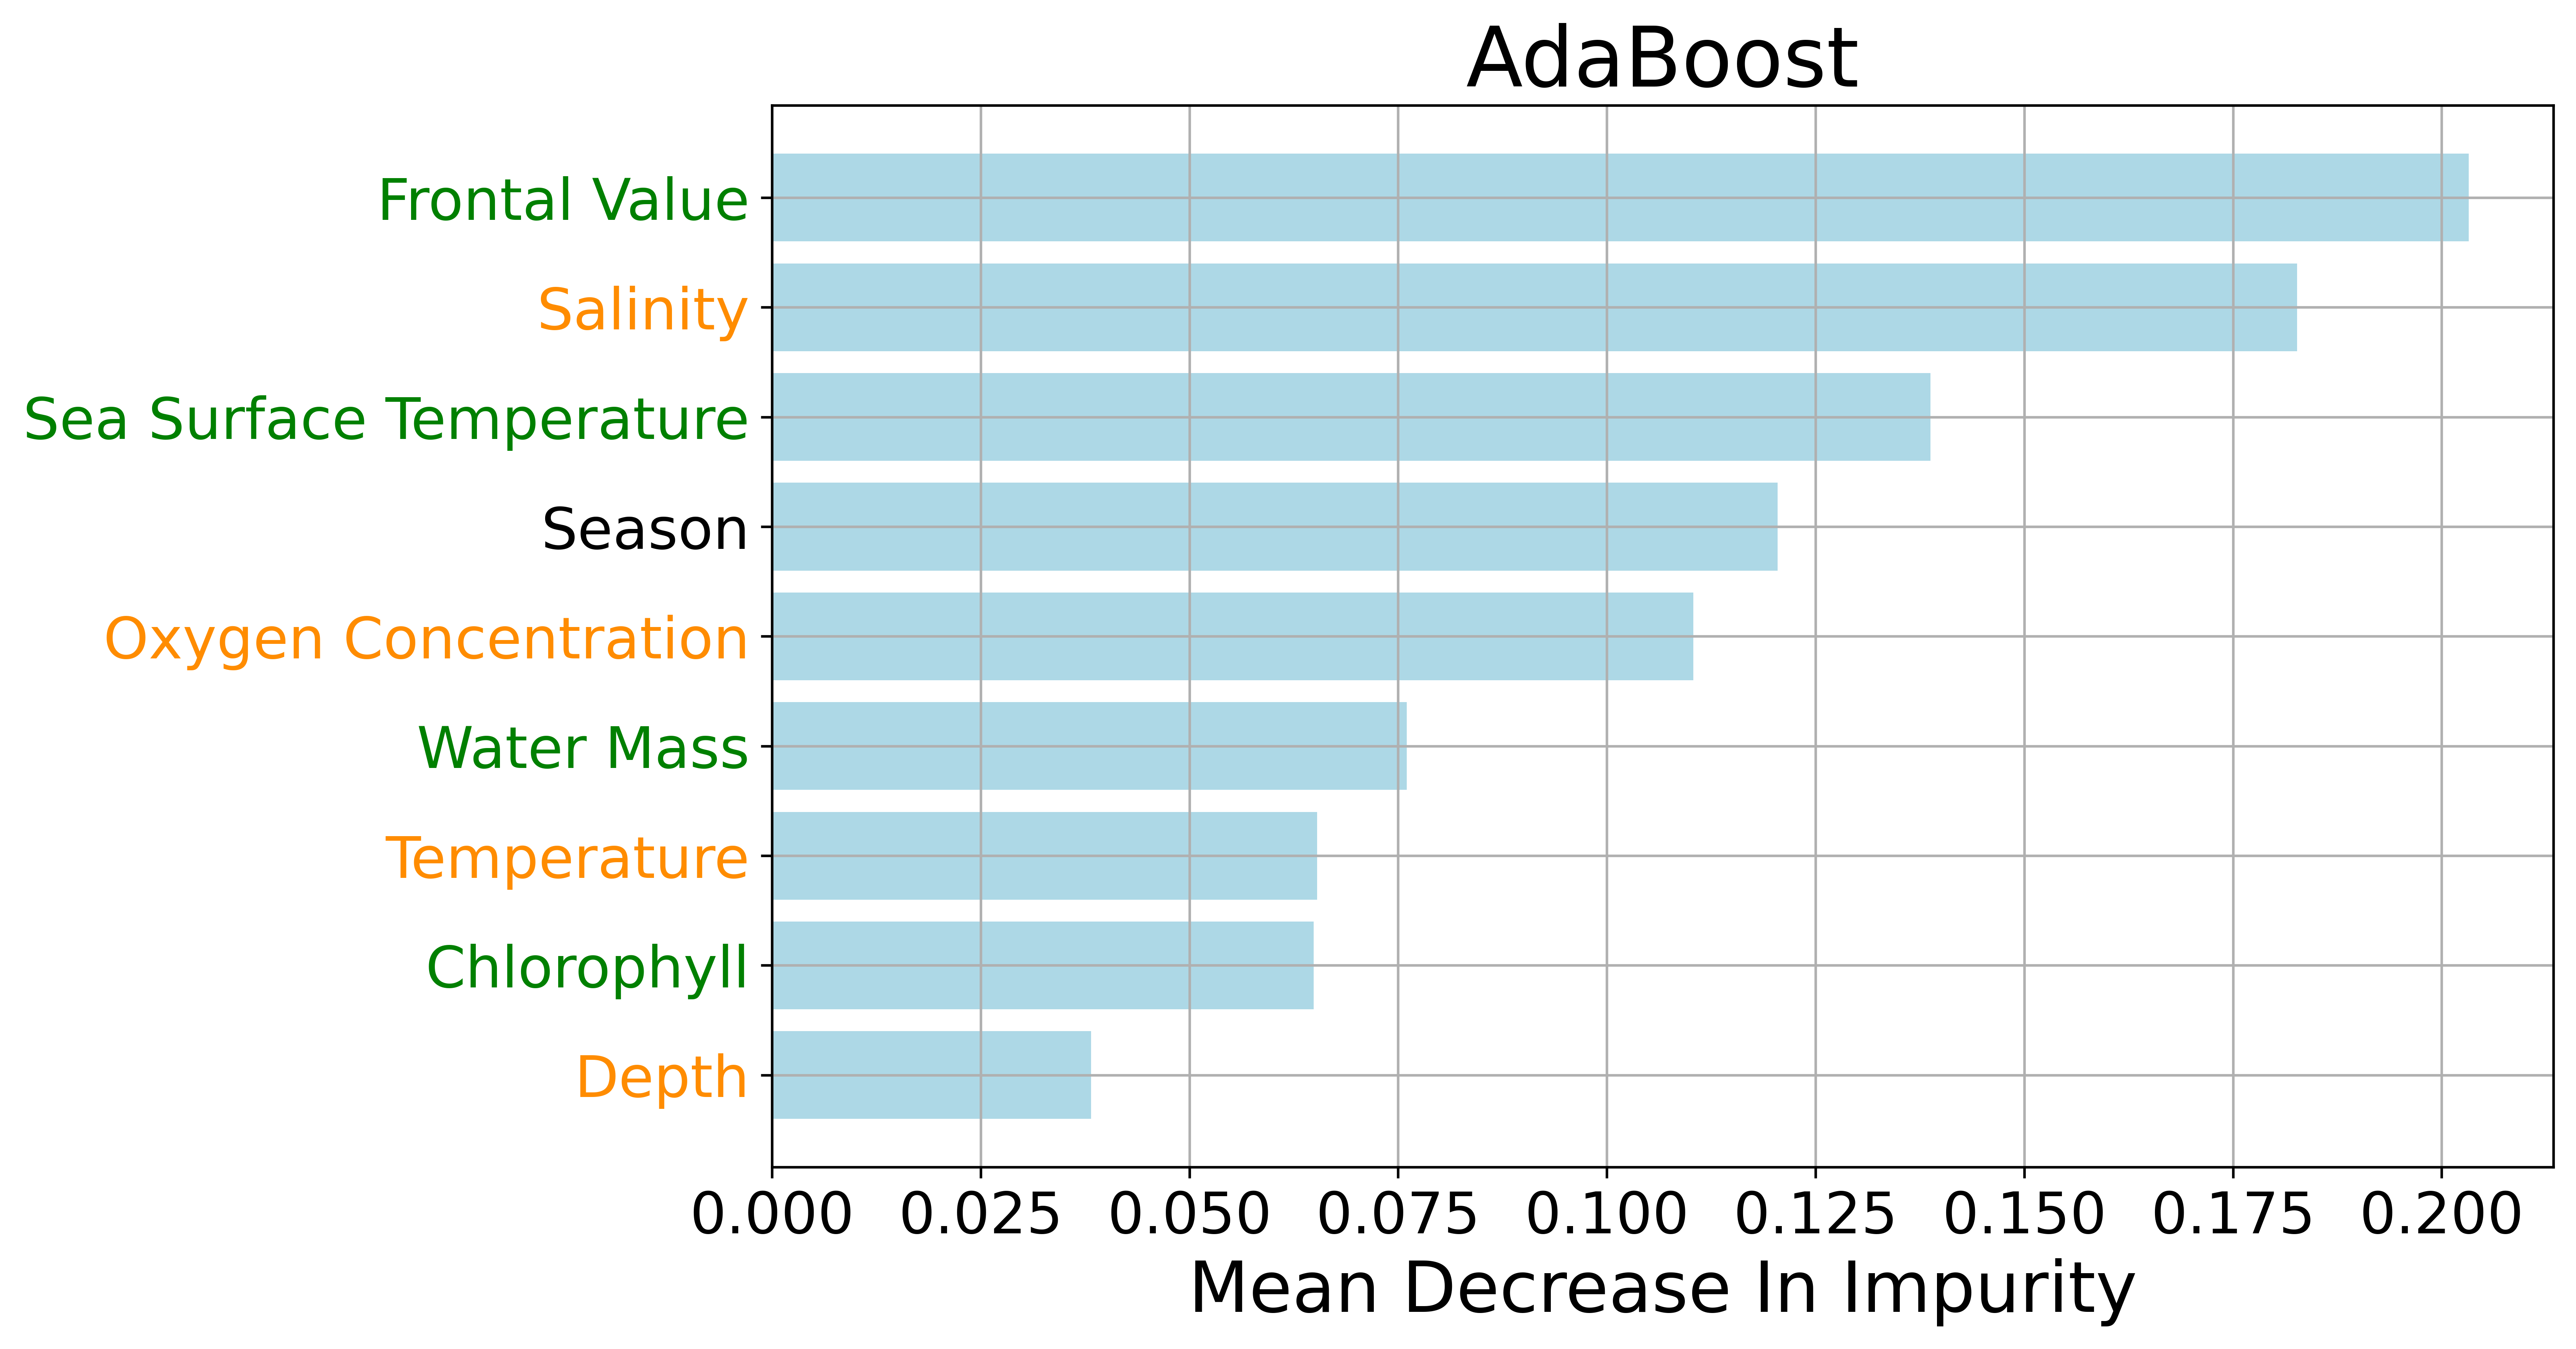

In [ ]:
ab_both_model = load("drive/My Drive/Model1/AdaBoost_both_2_model.joblib")
feature_importances = ab_both_model.feature_importances_
feature_names = ['Depth', 'Salinity', 'Temperature', 'Oxygen Concentration', 'Chlorophyll', 'Sea Surface Temperature', 'Water Mass', 'Frontal Value','Season']
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
print(importances_df.sort_values(by='Importance', ascending=False))

importances_df = importances_df.sort_values(by='Importance', ascending=True)


default_color = 'black'
colors_x = []
for feature in importances_df['Feature']:
    if feature in ['Depth', 'Salinity', 'Temperature', 'Oxygen Concentration']:
        colors_x.append('darkorange')
    elif feature in ['Chlorophyll', 'Sea Surface Temperature', 'Water Mass', 'Frontal Value']:
        colors_x.append('green')
    else:
        colors_x.append(default_color)


plt.figure(figsize=(10, 6), dpi=600)
plt.title("AdaBoost", fontsize=26)
plt.barh(importances_df['Feature'], importances_df['Importance'], color='LightBLue', align="center")


ax = plt.gca()
ax.set_yticks(range(len(importances_df['Feature'])))
ax.set_yticklabels(importances_df['Feature'], fontsize=18)
plt.xlabel('Mean Decrease In Impurity', fontsize=22)
#plt.ylabel('Features', fontsize=22)


for ticklabel, color in zip(ax.get_yticklabels(), colors_x):
    ticklabel.set_color(color)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.grid()
plt.savefig('ADA.png', dpi=600,bbox_inches='tight')
plt.show()

In [ ]:
## read all_test_sets
import pandas as pd
#all_test_sets = pd.read_csv('drive/My Drive/Model1/all_test_sets1.csv')
all_test_sets = pd.read_csv('drive/My Drive/all_test_sets1_new.csv')
test_set = all_test_sets[all_test_sets['iteration']==2]

In [ ]:
## SHAP ADA
import shap

explainer_ab = shap.KernelExplainer(ab_both_model.predict_proba,shap.sample(test_set[features_sets['both']],50))
shap_values_ab = explainer_ab.shap_values(test_set[features_sets['both']])

  0%|          | 0/875 [00:00<?, ?it/s]

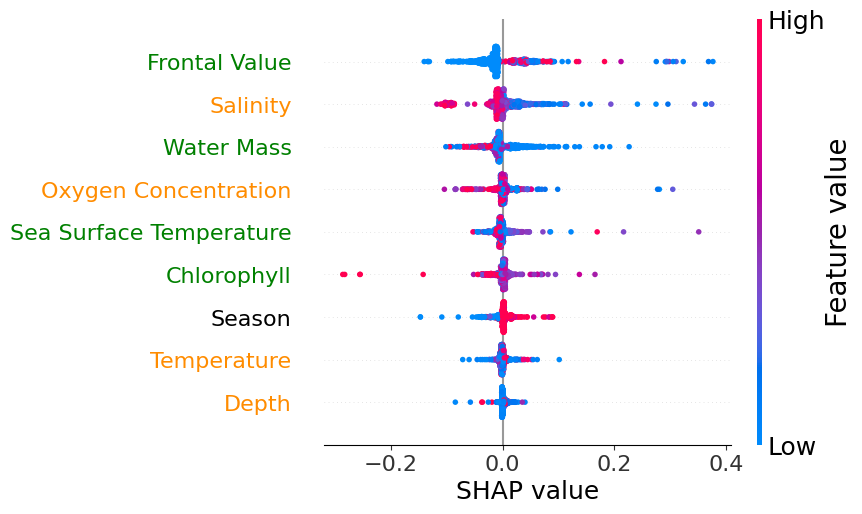

In [ ]:
feature_names = ['Depth', 'Salinity', 'Temperature', 'Oxygen Concentration', 'Chlorophyll', 'Sea Surface Temperature', 'Water Mass','Frontal Value', 'Season']

shap.summary_plot(shap_values_ab[:,:,1],test_set[features_sets['both']],feature_names = feature_names,show=False)
ax = plt.gca()
ax.grid(False)

labels = [item.get_text() for item in ax.get_yticklabels()]
custom_colors = {'Water Mass': 'green', 'Frontal Value': 'green', 'Sea Surface Temperature': 'green', 'Chlorophyll': 'green', 'Season': 'black'}
# Default color for others
for label in ax.get_yticklabels():
    text = label.get_text()
    label.set_color(custom_colors.get(text, 'darkorange'))

cbar = plt.gcf().get_axes()[-1]
cbar.tick_params(labelsize=18)
cbar.set_ylabel('Feature value', fontsize=20)
ax.set_xlabel('SHAP value', fontsize=18)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.savefig('ShapAda.png', dpi=600,bbox_inches='tight')

plt.show()


In [ ]:
## random forest data
rf_both_model = load("drive/My Drive/Model1/Random Forest_both_2_model.joblib")
test_set_r = all_test_sets[all_test_sets['iteration']==2]

In [ ]:
explainer_rf = shap.TreeExplainer(rf_both_model)
shap_values_rf = explainer_rf.shap_values(test_set_r[features_sets['both']])

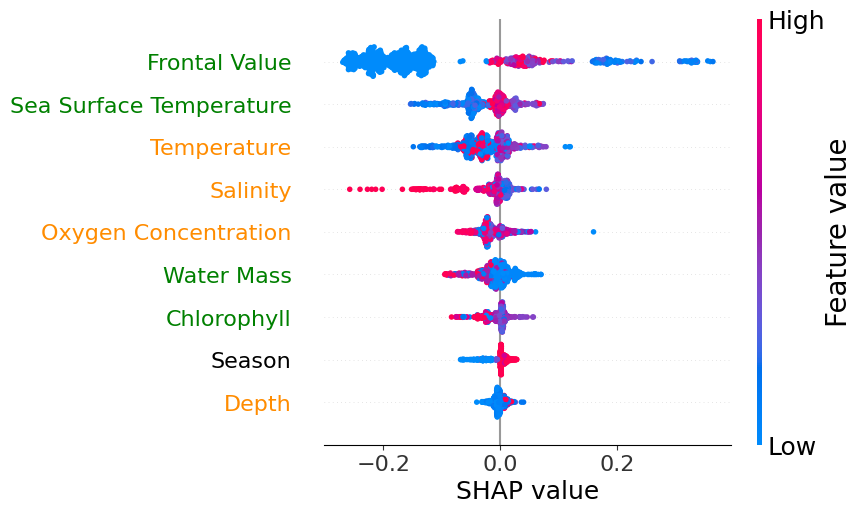

In [ ]:
feature_names = ['Depth', 'Salinity', 'Temperature', 'Oxygen Concentration', 'Chlorophyll', 'Sea Surface Temperature', 'Water Mass','Frontal Value', 'Season']

shap.summary_plot(shap_values_rf[:,:,1], test_set_r[features_sets['both']],feature_names = feature_names,show=False)
ax = plt.gca()
ax.grid(False)

labels = [item.get_text() for item in ax.get_yticklabels()]
custom_colors = {'Water Mass': 'green', 'Frontal Value': 'green', 'Sea Surface Temperature': 'green', 'Chlorophyll': 'green', 'Season': 'black'}
# Default color for others
for label in ax.get_yticklabels():
    text = label.get_text()
    label.set_color(custom_colors.get(text, 'darkorange'))

cbar = plt.gcf().get_axes()[-1]
cbar.tick_params(labelsize=18)
cbar.set_ylabel('Feature value', fontsize=20)
ax.set_xlabel('SHAP value', fontsize=18)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

plt.savefig('ShapRF.png', dpi=600,bbox_inches='tight')

plt.show()

In [ ]:
## seasonal analysis
glider_spring = all_test_sets[all_test_sets['season']==1]
glider_summer = all_test_sets[all_test_sets['season']==2]
glider_fall = all_test_sets[all_test_sets['season']==3]
glider_winter =all_test_sets[all_test_sets['season']==4]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable

datasets = {
    'Summer': glider_summer,
    'Spring': glider_spring,
    'Fall': glider_fall,
    'Winter': glider_winter
}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 16), dpi=600, gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1, 1]})
axes = axes.flatten()

for ax, (season, dataset) in zip(axes, datasets.items()):
    accuracy = accuracy_score(dataset['Whale_Status_Code'], dataset['AdaBoost_both_pred'])
    f1 = f1_score(dataset['Whale_Status_Code'], dataset['AdaBoost_both_pred'])
    matrix = confusion_matrix(dataset['Whale_Status_Code'], dataset['AdaBoost_both_pred'], labels=[0, 1])

    sns_heatmap = sns.heatmap(matrix, annot=True, fmt='g', cmap='YlGnBu', annot_kws={'size': 36}, ax=ax, square=True, cbar=False)
    ax.set_title(f'{season}', fontsize=30)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticklabels(['absent', 'present'], fontsize=36)
    ax.set_yticklabels(['absent', 'present'], fontsize=36)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = plt.colorbar(sns_heatmap.collections[0], cax=cax)
    cbar.ax.tick_params(labelsize=20)

fig.text(0.5, 0.04, 'Predicted', ha='center', fontsize=36)
fig.text(0.04, 0.5, 'Actual', va='center', rotation='vertical', fontsize=36)
fig.text(0.96, 0.5, 'Number of Samples', va='center', rotation='vertical', fontsize=36)

plt.subplots_adjust(wspace=0.3, hspace=0.2)  # adjust subplot
plt.savefig('Confusion.png', dpi=600,bbox_inches='tight')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


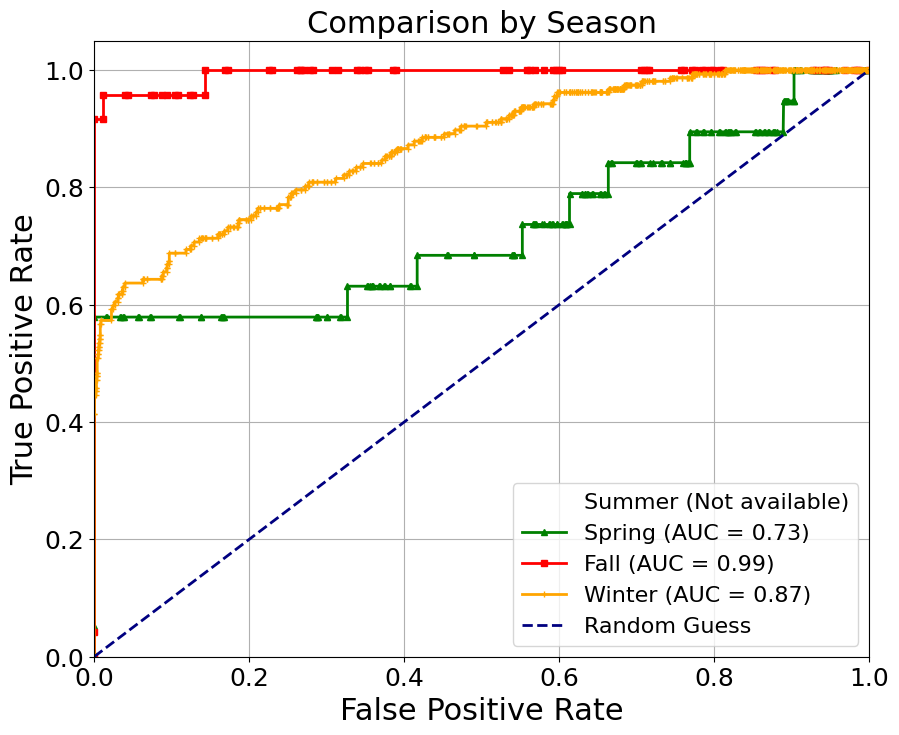

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

colors = ['blue', 'green', 'red', 'orange']
markers = ['x', '^', 's', '+']
seasons = ['Summer', 'Spring', 'Fall', 'Winter']

fig, ax = plt.subplots(figsize=(10, 8))
datasets = {
    'Summer': glider_summer,
    'Spring': glider_spring,
    'Fall': glider_fall,
    'Winter': glider_winter
}

for season, color, marker in zip(seasons, colors,markers):
    dataset = datasets[season]
    if len(set(dataset['Whale_Status_Code'])) > 1:
        fpr, tpr, _ = roc_curve(dataset['Whale_Status_Code'], dataset['AdaBoost_both_prob'])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, color=color, marker=marker,markersize=5,lw=2, label=f'{season} (AUC = {roc_auc:.2f})')
    else:
        # only contain one class(summer)
        ax.plot([], [], ' ', label=f'{season} (Not available)')


ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=22)
ax.set_ylabel('True Positive Rate', fontsize=22)
ax.set_title('Comparison by Season', fontsize=22)
ax.legend(loc="lower right", fontsize=16)
ax.tick_params(labelsize=18)
plt.grid(True)

plt.savefig('ROC_season_comparison.png', dpi=600, bbox_inches='tight')
plt.show()


In [ ]:
pip install cartopy geopy geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 71.6 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import pandas as pd
import cartopy.io.shapereader as shpreader
from shapely.geometry import Point, LineString
from shapely.ops import nearest_points
import os
from geopy.distance import geodesic
# Load the 10m coastline data from Natural Earth
coastline_shp = shpreader.natural_earth(resolution='10m', category='physical', name='coastline')
coastline_gdf = gpd.read_file(coastline_shp)

# Restrict to the bounding box of interest
bbox = (-75, 38.48, -73.5, 39.7)
coastline_gdf = coastline_gdf.cx[bbox[0]:bbox[2], bbox[1]:bbox[3]]

# Function to calculate distance from point to nearest coastline
def calculate_distance_to_coastline(point, coastline):
    nearest_geom = nearest_points(point, coastline.unary_union)[1]
    point_coords = (point.y, point.x)  # (latitude, longitude)
    nearest_coords = (nearest_geom.y, nearest_geom.x)  # (latitude, longitude)
    return geodesic(point_coords, nearest_coords).meters  # return meter

# Load your data file containing latitude and longitude
data_file = 'drive/My Drive/all_test_sets1_new.csv'  # Change to your actual file path
df = pd.read_csv(data_file)

# Convert DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Calculate distance to coastline
geo_df['distance_to_coastline'] = geo_df['geometry'].apply(calculate_distance_to_coastline, coastline=coastline_gdf)

# Classify as near shore or offshore
threshold_km = 50
geo_df['location_type'] = geo_df['distance_to_coastline'].apply(lambda x: 'near shore' if x <= threshold_km * 1000 else 'offshore')

# Print and save results
print(geo_df[['lat', 'lon', 'distance_to_coastline', 'location_type']])


# geo_df.to_csv('drive/My Drive/processed_shore_data.csv', index=False)


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


          lat      lon  distance_to_coastline location_type
0     38.9071 -74.3656           36458.223131    near shore
1     38.7933 -73.8552           80380.983562      offshore
2     39.1095 -74.0629           41960.939170    near shore
3     38.6579 -74.0069           85238.114816      offshore
4     39.2714 -74.1895           21061.005252    near shore
...       ...      ...                    ...           ...
8745  39.2286 -74.2300           22202.384731    near shore
8746  38.8169 -74.2741           48872.319540    near shore
8747  39.1717 -74.3750           20042.248510    near shore
8748  38.8195 -74.2647           49320.711590    near shore
8749  38.9472 -74.2488           47682.367559    near shore

[8750 rows x 4 columns]


In [ ]:
offshore = geo_df[geo_df['location_type']=='offshore']
nearshore = geo_df[geo_df['location_type']=='near shore']

In [ ]:
geo_df.to_csv('drive/My Drive/processed_shore_data.csv', index=False)

Accuracy: 0.985099846390169
F1 Score: 0.6339622641509434
Precision: 0.8
Recall (TPR): 0.525
TNR: 0.9966929133858268


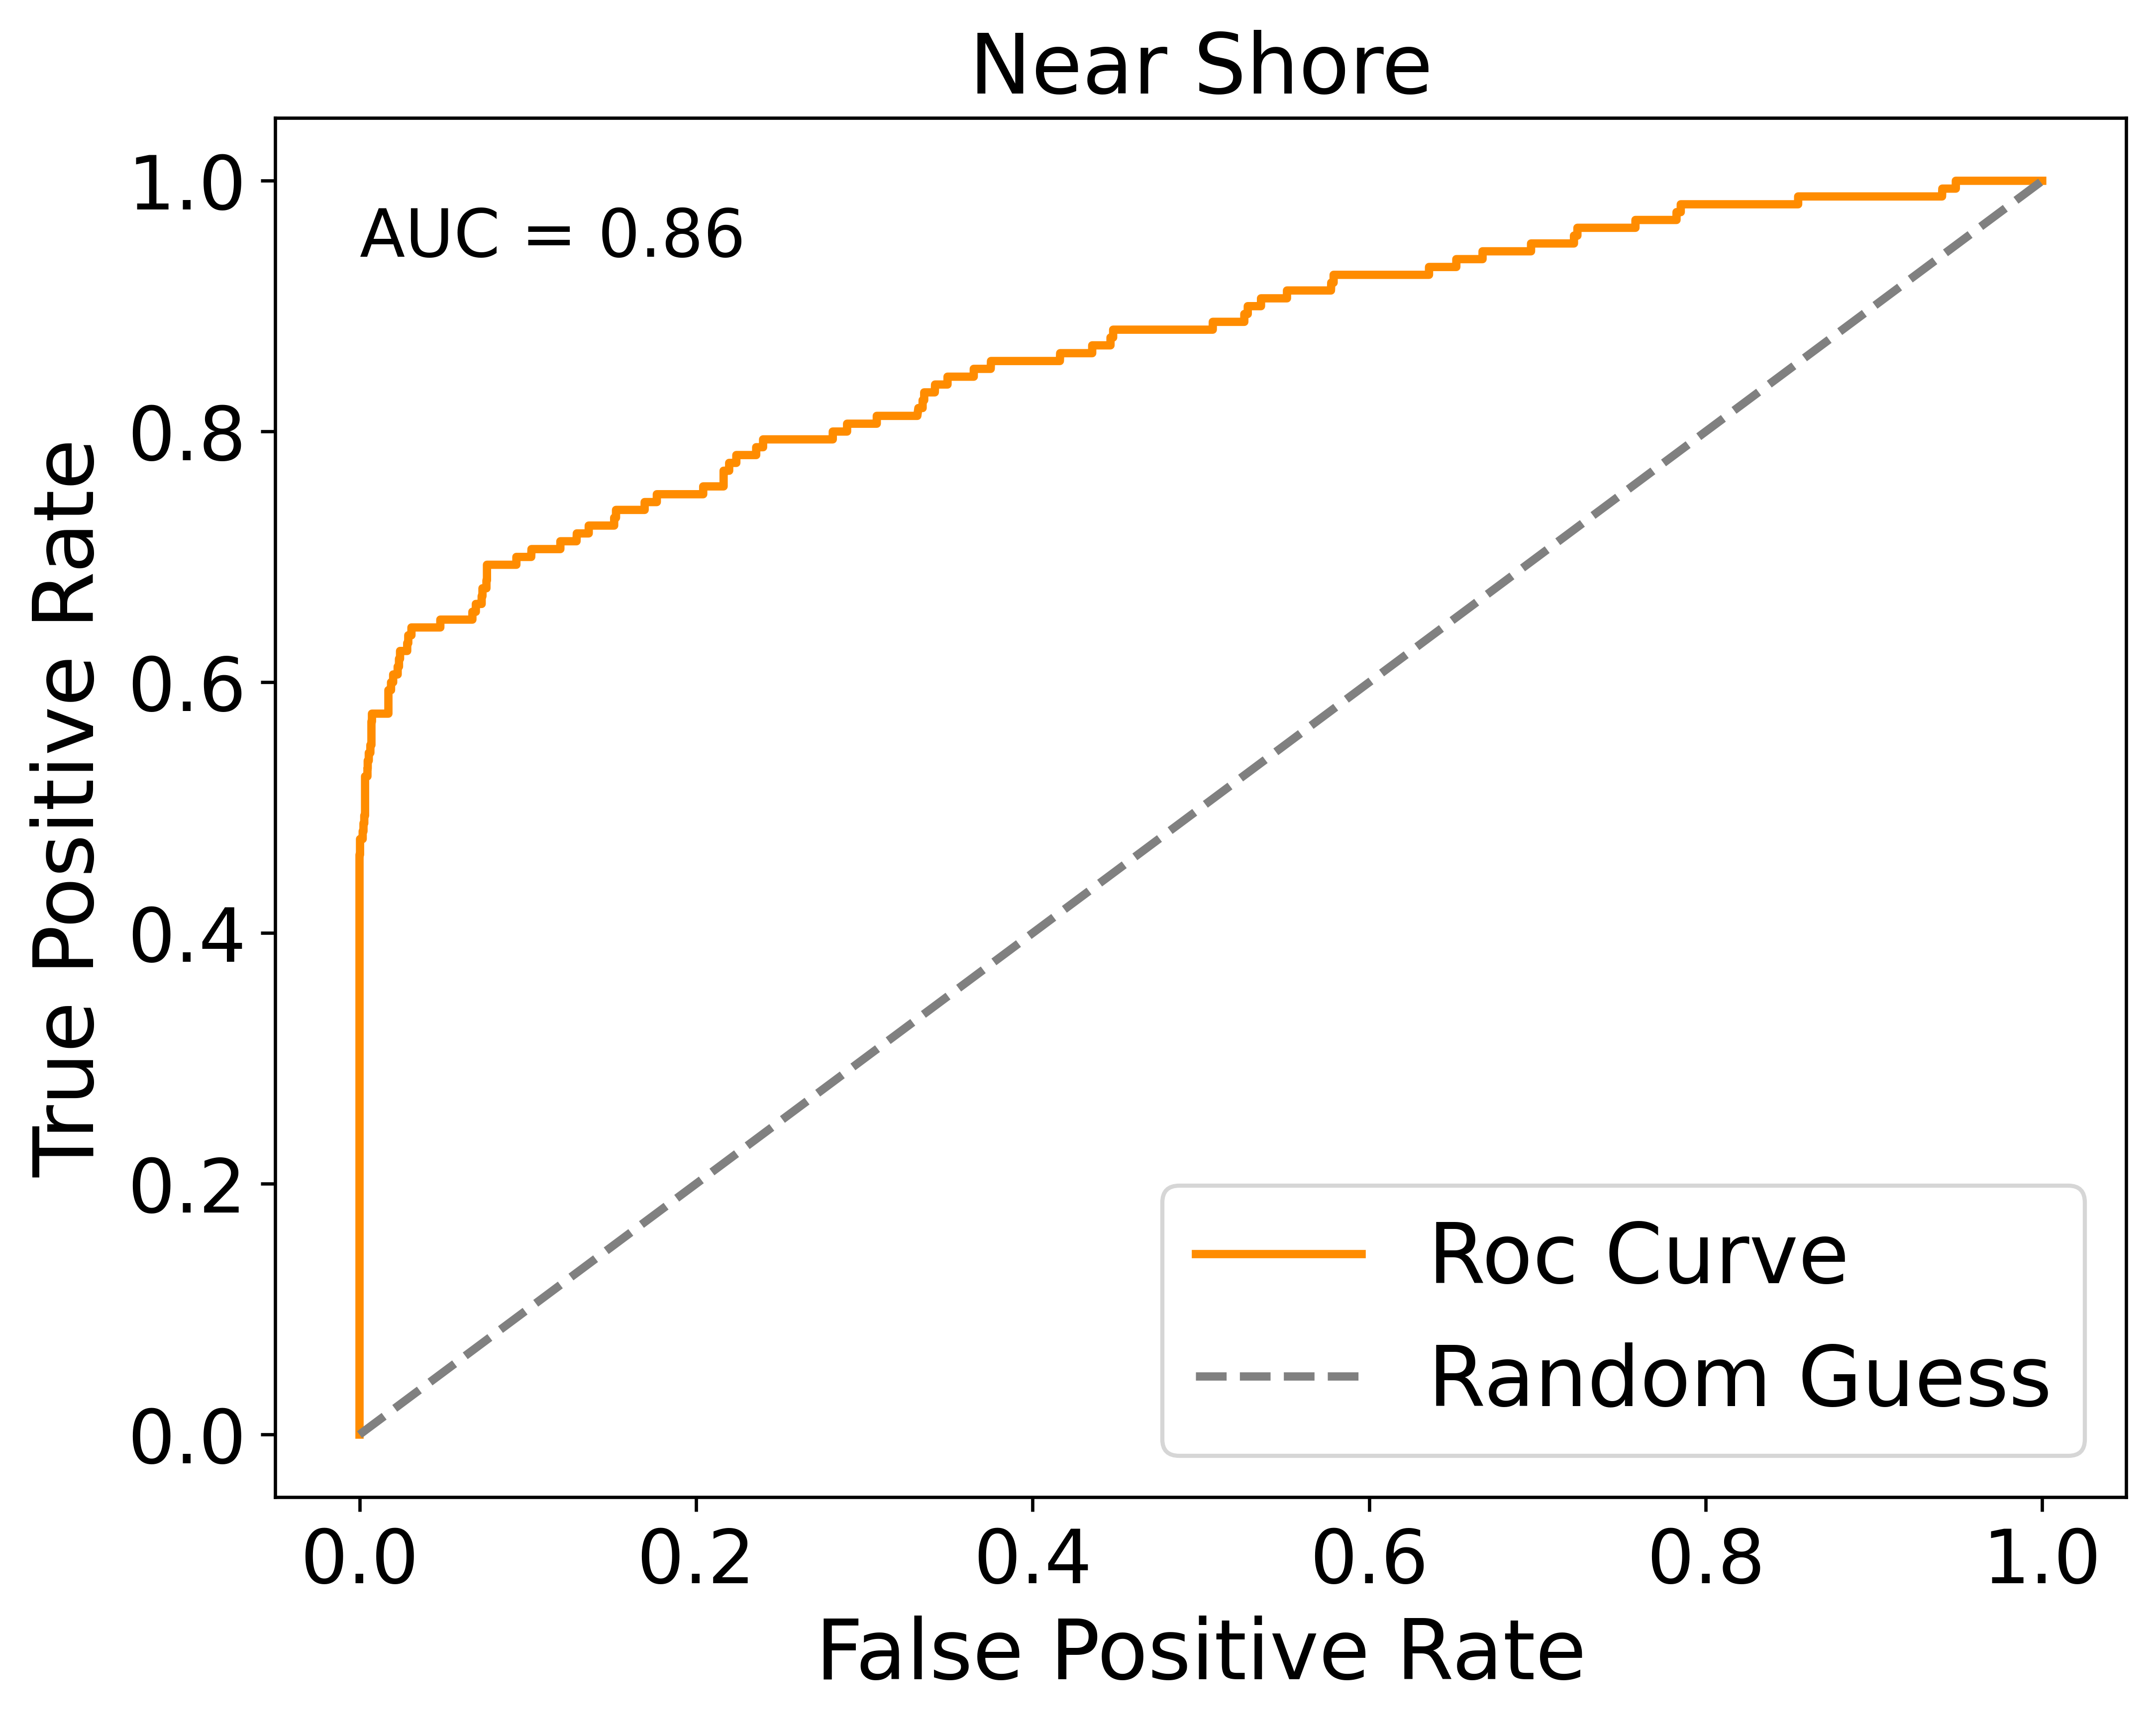

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

df = nearshore

y_true = df['Whale_Status_Code']
y_pred = df['AdaBoost_both_pred']
y_prob = df['AdaBoost_both_prob']

cm = confusion_matrix(y_true, y_pred)

accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
tpr = recall
tnr = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall (TPR): {recall}')
print(f'TNR: {tnr}')

# plt.figure(figsize=(8, 6), dpi=600)
# ax = plt.gca()
# sns_heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False,square=True,
#             xticklabels=['Absent', 'Present'],
#             yticklabels=['Absent', 'Present'],
#             annot_kws={'size': 30},ax=ax)
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)
# cbar = plt.colorbar(sns_heatmap.get_children()[0], cax=cax)
# cbar.ax.tick_params(labelsize=20)
# cbar.set_label('Number of Samples', fontsize=20)

# ax.set_xlabel('Predicted', fontsize=20)
# ax.set_ylabel('Actual', fontsize=20)
# ax.set_title('Near Shore', fontsize=20)
# ax.set_xticklabels(['absent', 'present'], fontsize=20)
# ax.set_yticklabels(['absent', 'present'], fontsize=20)
# plt.savefig('Near shore_conf.png',dpi=600,bbox_inches='tight')
# plt.show()

# Roc curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = roc_auc_score(y_true, y_prob)

plt.figure(figsize=(8, 6), dpi=600)
plt.plot(fpr, tpr, color='darkorange', lw=2, label= 'Roc Curve')
auc_label = f'AUC = {roc_auc:.2f}'
plt.text(0.00, 0.98, auc_label, fontsize=16, verticalalignment='top')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=2,label = 'Random Guess')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.title('Near Shore', fontsize=20)
plt.legend(loc='lower right', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.savefig('Near shore_roc.png',dpi=600,bbox_inches='tight')
plt.show()


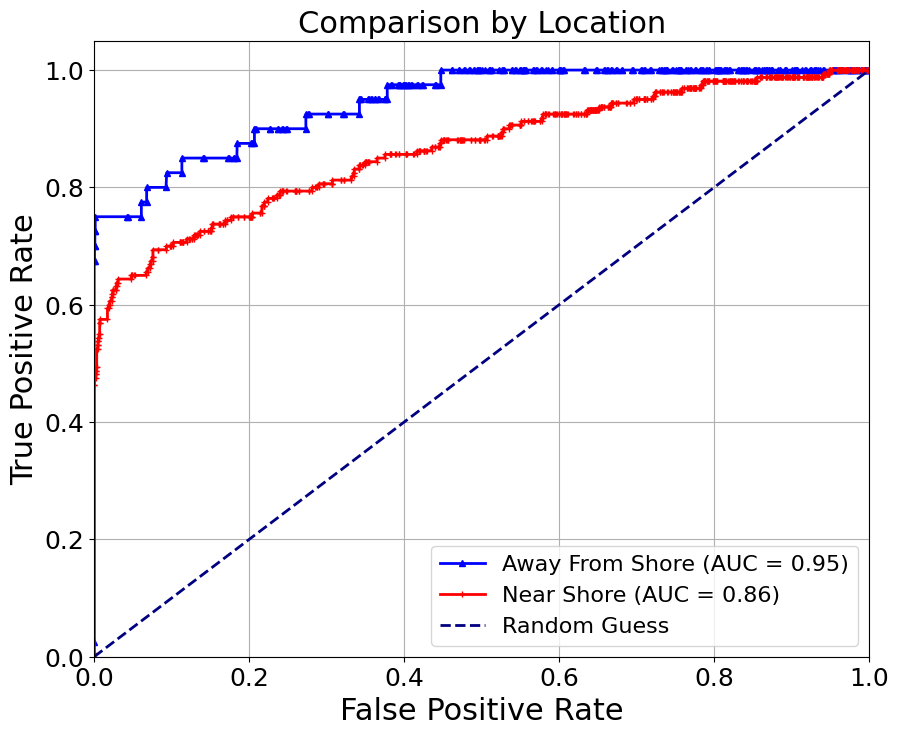

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

colors = ['blue', 'red']
markers = ['^', '+']
shores = ['Away From Shore', 'Near Shore']

fig, ax = plt.subplots(figsize=(10, 8))
datasets = {
    'Away From Shore': offshore,
    'Near Shore': nearshore
}

for shore, color, marker in zip(shores, colors, markers):
    df = datasets[shore]
    y_true = df['Whale_Status_Code']
    y_pred = df['AdaBoost_both_pred']
    y_prob = df['AdaBoost_both_prob']

    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, color=color, marker=marker,markersize=4,lw=2, label=f'{shore} (AUC = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=22)
ax.set_ylabel('True Positive Rate', fontsize=22)
ax.set_title('Comparison by Location', fontsize=22)
ax.legend(loc="lower right", fontsize=16)
ax.tick_params(labelsize=18)
plt.grid(True)

plt.savefig('ROC_spatial_comparison.png', dpi=600, bbox_inches='tight')
plt.show()

